In [74]:
"""
matchTemplate 是 OpenCV 中一种常用的模板匹配方法，用于在图像中寻找与模板最相似的区域。它的参数和返回值如下：
参数：

    image：输入图像，必须为单通道灰度图像。
    templ：模板图像，必须为单通道灰度图像。
    method：匹配方法，可选值包括 CV_TM_SQDIFF、CV_TM_SQDIFF_NORMED、CV_TM_CCORR、CV_TM_CCORR_NORMED、CV_TM_CCOEFF和 CV_TM_CCOEFF_NORMED。
    result：输出结果，必须为单通道浮点型图像，大小为 (W - w + 1, H - h + 1)，其中 W、H 为原图像的宽度和高度，w、h 为模板图像的宽度和高度。
返回值：

result：输出结果，即匹配得分图像，它的大小为 (W - w + 1, H - h + 1)，其中 W、H 为原图像的宽度和高度，w、h 为模板图像的宽度和高度。
OpenCV的matchTemplate函数是用来在一幅图像中寻找另一幅图像的匹配的。在匹配过程中，可以选择不同的匹配方法，也就是method参数。常用的method参数有以下几种：
    cv2.TM_SQDIFF：平方差匹配法，最简单的匹配方法，计算平方差和，值越小越匹配。
    cv2.TM_SQDIFF_NORMED：标准平方差匹配法，同样计算平方差和，但是会对结果进行标准化处理。注意使用距离来计算被匹配图像一定要小于原图像
    cv2.TM_CCORR：相关性匹配法，#，值越大越匹配。
    cv2.TM_CCORR_NORMED：标准相关性匹配法，对结果进行标准化处理,返回值越大表示匹配程度越高，越小表示匹配程度越低。
        该参数使用的是归一化相关系数匹配模式，
        返回的是匹配图像和模板图像之间的相关系数，取值范围在 0 到 1 之间，1 表示完美匹配，0 表示没有匹配。
    cv2.TM_CCOEFF：相关系数匹配法，计算两个图像的相关系数，值越大越匹配。
    cv2.TM_CCOEFF_NORMED：标准相关系数匹配法，对结果进行标准化处理。

以上就是常用的matchTemplate方法，具体使用哪一种方法需要根据具体的图像匹配任务来决定。
"""
import cv2
image=cv2.imread("./images/1.jpg");
grayImg=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
matchImg=cv2.imread("./images/1_match.jpg",0);
result=cv2.matchTemplate(grayImg,matchImg,cv2.TM_SQDIFF_NORMED)
print(grayImg.shape)
print(matchImg.shape)
print(result.shape)

(482, 484)
(93, 93)
(390, 392)


1.6148353097378276e-05 0.23120518028736115 (146, 263) (10, 162)


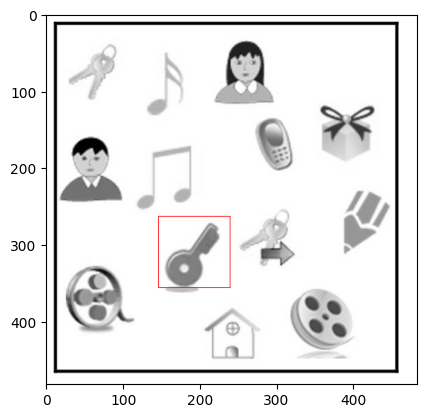

In [75]:
"""
matchTemplate()方法的计算结果是一个二维数组，OpenCV提供了一个minMaxLoc()方法专门用来解析这个二维数组中的最大值、最小值以及这2个值对应的坐标，minMaxLoc()方法的语法如下：
 minValue, maxValue, minLoc, maxLoc = cv2.minMaxLoc(src, mask)
参数说明：

　src：matchTemplate()方法计算得出的数组。
　mask：可选参数，掩模，建议使用默认值。
返回值说明：

　minValue：数组中的最小值。
　maxValue：数组中的最大值。
　minLoc：最小值的坐标，格式为(x, y)。
　maxLoc：最大值的坐标，格式为(x, y)。
"""
import matplotlib.pyplot as plt
minValue, maxValue, minLoc, maxLoc =cv2.minMaxLoc(result) #平方差的匹配方法越小的点越好
heigth,width=matchImg.shape
x,y=minLoc
print(minValue, maxValue, minLoc, maxLoc)
showImage=image.copy()
cv2.rectangle(showImage, minLoc, (x + width, y + heigth), (255, 0, 0), 1)
plt.imshow(showImage,cmap="gray")

(146, 151) 0.9990195
(145, 152) 0.9990638
(146, 152) 0.99999326
(147, 152) 0.9990609
(146, 153) 0.9990161
(330, 189) 0.9991905
(331, 189) 0.9997063
(331, 190) 0.9996666
(363, 361) 0.99974763
(364, 361) 0.99918723
(363, 362) 0.9994543
(364, 362) 0.99932945


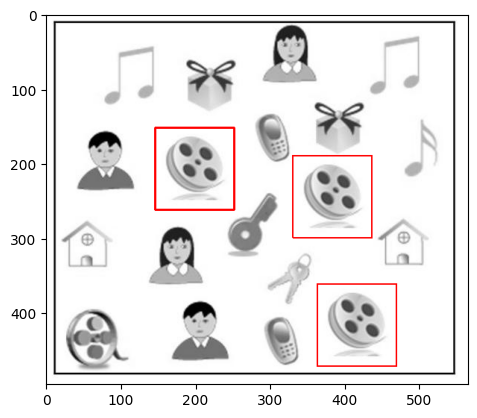

In [76]:
#多目标匹配
image=cv2.imread("./images/2.jpg");
grayImg=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
matchImg=cv2.imread("./images/2_match_1.jpg",0);
height,width=matchImg.shape
result=cv2.matchTemplate(grayImg,matchImg,cv2.TM_CCORR_NORMED)
showImage=image.copy()
for y in range(len(result)):
    for x in range(len(result[y])):
        if result[y][x]>0.999:
            cv2.rectangle(showImage, (x,y), (x + width, y + height), (255, 0, 0), 1)

plt.imshow(showImage,cmap="gray")